# 作業重點:

(1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化

(2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

# 作業目標:
    
    取得各種優化器的運算結果

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras import optimizers


Using TensorFlow backend.


In [2]:
import tensorflow as tf
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction = 0.333)
sess = tf.compat.v1.Session(config = tf.compat.v1.ConfigProto(gpu_options = gpu_options))

In [10]:

'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
batch_size_ = [8,16,32,64,128,256]
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'


In [4]:

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
def create_model():
    model = Sequential()

#   第二步：構建網絡層
    model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
    model.add(Activation('softmax')) # 最後一層用softmax作為激活函數
    
    
    return model



In [8]:
#第三步編譯
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''

'''
Example:
opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

'''

In [6]:
# 資料正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 46s - loss: 1.5268 - accuracy: 0.4424 - val_loss: 1.2449 - val_accuracy: 0.5559
Epoch 2/10
 - 46s - loss: 1.2149 - accuracy: 0.5677 - val_loss: 1.0606 - val_accuracy: 0.6270
Epoch 3/10
 - 46s - loss: 1.1177 - accuracy: 0.6035 - val_loss: 0.9338 - val_accuracy: 0.6686
Epoch 4/10
 - 46s - loss: 1.0491 - accuracy: 0.6307 - val_loss: 0.9117 - val_accuracy: 0.6855
Epoch 5/10
 - 46s - loss: 1.0107 - accuracy: 0.6482 - val_loss: 0.9928 - val_accuracy: 0.6557
Epoch 6/10
 - 46s - loss: 0.9791 - accuracy: 0.6588 - val_loss: 0.8768 - val_accuracy: 0.6984
Epoch 7/10
 - 46s - loss: 0.9493 - accuracy: 0.6708 - val_loss: 0.8965 - val_accuracy: 0.6880
Epoch 8/10
 - 46s - loss: 0.9374 - accuracy: 0.6740 - val_loss: 0.9017 - val_accuracy: 0.6878
Epoch 9/10
 - 46s - loss: 0.9236 - accuracy: 0.6773 - val_loss: 1.0619 - val_accuracy: 0.6376
Epoch 10/10
 - 48s - loss: 0.9026 - accuracy: 0.6872 - val_loss: 0.8456 - val_accuracy: 0.7088
Train on 

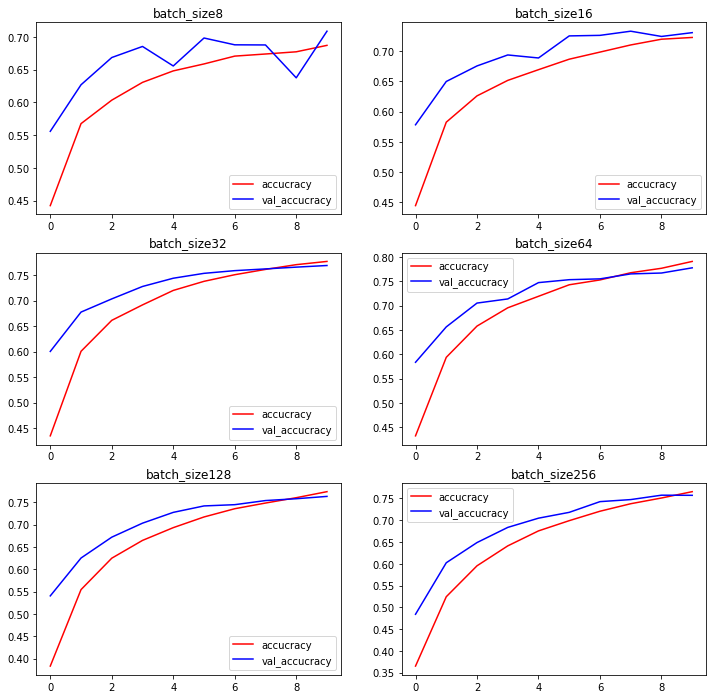

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,12))
plot_num = 1
for i in batch_size_:
    model = create_model()
    model.compile(optimizer ='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model_name = 'batch_size'+''+str(i)  
    train_history = model.fit(x_train , y_train , batch_size = i , epochs = 10 , validation_data = (x_test,y_test) , verbose = 2)
    plt.subplot(3,2,plot_num)
    plt.plot(train_history.history['accuracy'],'r',label = 'accucracy')
    plt.plot(train_history.history['val_accuracy'],'b',label = 'val_accucracy')
    plt.legend()
    plt.title(model_name)
    plot_num += 1
        

plt.show()
 


In [11]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at C:\Users\Jeffrey.yc Chen\Downloads\ML100\Temp\Day76\saved_models\keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 14s 1ms/step
Test loss: 0.6803855864524841
Test accuracy: 0.7766


In [12]:
#    第六步：輸出
import numpy 

print ( " test set " )
scores = model.evaluate(x_test,y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)


result = model.predict(x_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)


 test set 

 The test loss is %f  [0.680385582447052, 0.7765999960899354]


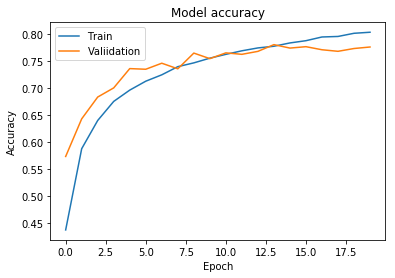

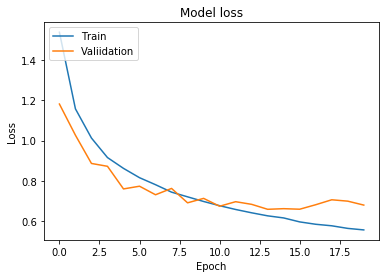

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 13s 265us/step - loss: 2.1433 - accuracy: 0.1994 - val_loss: 1.9391 - val_accuracy: 0.2936
Epoch 2/20
50000/50000 [==============================] - 13s 258us/step - loss: 1.8824 - accuracy: 0.3156 - val_loss: 1.6798 - val_accuracy: 0.3999
Epoch 3/20
50000/50000 [==============================] - 13s 260us/step - loss: 1.6761 - accuracy: 0.3913 - val_loss: 1.5733 - val_accuracy: 0.4237
Epoch 4/20
50000/50000 [==============================] - 13s 260us/step - loss: 1.5337 - accuracy: 0.4429 - val_loss: 1.4185 - val_accuracy: 0.4888
Epoch 5/20
50000/50000 [==============================] - 13s 261us/step - loss: 1.4218 - accuracy: 0.4853 - val_loss: 1.2940 - val_accuracy: 0.5362
Epoch 6/20
50000/50000 [==============================] - 13s 261us/step - loss: 1.3392 - accuracy: 0.5196 - val_loss: 1.2109 - val_accuracy: 0.5687
Epoch 7/20
50000/50000 [==============================] 

Epoch 15/20
50000/50000 [==============================] - 15s 303us/step - loss: 1.2483 - accuracy: 0.6007 - val_loss: 1.5344 - val_accuracy: 0.6225
Epoch 16/20
50000/50000 [==============================] - 15s 295us/step - loss: 1.2837 - accuracy: 0.5926 - val_loss: 1.1350 - val_accuracy: 0.6192
Epoch 17/20
50000/50000 [==============================] - 15s 304us/step - loss: 1.3232 - accuracy: 0.5774 - val_loss: 1.2341 - val_accuracy: 0.5711
Epoch 18/20
50000/50000 [==============================] - 16s 321us/step - loss: 1.3603 - accuracy: 0.5662 - val_loss: 1.2071 - val_accuracy: 0.5893
Epoch 19/20
50000/50000 [==============================] - 16s 318us/step - loss: 1.3885 - accuracy: 0.5551 - val_loss: 1.1450 - val_accuracy: 0.6115
Epoch 20/20
50000/50000 [==============================] - 15s 294us/step - loss: 1.3995 - accuracy: 0.5480 - val_loss: 1.2590 - val_accuracy: 0.5824
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==========================

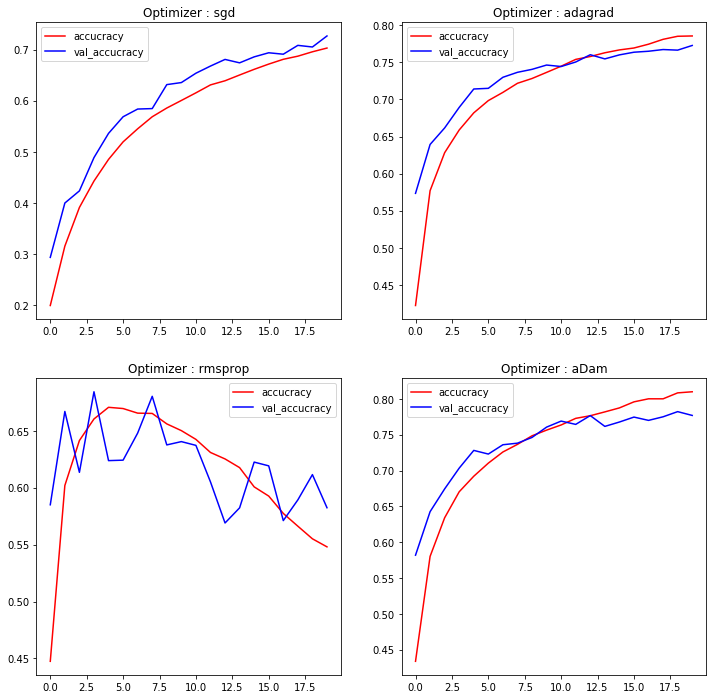

In [12]:
#  SGD, Adam, Rmsprop 的 accurancy
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=0, momentum=0.9, nesterov=True)
adagrad = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
rmsprop = optimizers.RMSprop(lr=0.01, epsilon=None, decay=0.0)
aDam = optimizers.Adam(lr=0.01, epsilon=None, decay=0.0) 

optimizer = ['sgd','adagrad','rmsprop','aDam']

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,12))
plot_num = 1
for i in optimizer:
    model = create_model()
    model.compile(optimizer = i , loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model_name = 'Optimizer : '+ i 
    train_history = model.fit(x_train , y_train , batch_size = 32 , epochs = 20 , validation_data = (x_test,y_test) , verbose = 1)
    plt.subplot(2,2,plot_num)
    plt.plot(train_history.history['accuracy'],'r',label = 'accucracy')
    plt.plot(train_history.history['val_accuracy'],'b',label = 'val_accucracy')
    plt.legend()
    plt.title(model_name)
    plot_num += 1
        

plt.show()